In [1]:
import torch
from torch.utils.data import DataLoader
from torchvision import transforms
import numpy as np
from custom_dataset import Binary_Dataset
from matplotlib import pyplot as plt
from PIL import Image
import os
from inception import inception_v3
%matplotlib inline

# Define Dataloaders for each class


In [2]:
#define relevant paths
labels_dir="Data\list_attr_celeba.csv"
image_dir="Data\img_align_celeba\img_align_celeba"

############################################define batch size for all data loaders here
bathsize=32

##############################################define num workers for data laoders here
workers=4

#define composed transforms
composed = transforms.Compose([transforms.ToTensor()])

labels=["No_Beard","Male","Bald","Bangs","Smiling"]
label_number=0
#Choose which label 
ds=Binary_Dataset(labels_dir, labels[label_number],image_dir ,transform=composed)
dataset_loader=DataLoader(ds,batch_size=bathsize, shuffle=True, num_workers=workers)

"""
# male
ds1=Binary_Dataset(labels_dir, labels[1],image_dir ,transform=composed)
dataset_loader=DataLoader(ds1,batch_size=bathsize, shuffle=True, num_workers=workers)

# bald
ds2=Binary_Dataset(labels_dir, labels[2],image_dir ,transform=composed)
dataset_loader=DataLoader(ds2,batch_size=bathsize, shuffle=True, num_workers=workers)

# bangs
ds3=Binary_Dataset(labels_dir, labels[3],image_dir ,transform=composed)
dataset_loader=DataLoader(ds3,batch_size=bathsize, shuffle=True, num_workers=workers)

# smiling
ds4=Binary_Dataset(labels_dir, labels[4],image_dir ,transform=composed)
dataset_loader=DataLoader(ds4,batch_size=bathsize, shuffle=True, num_workers=workers)
"""

"""
for idx, (data, image) in enumerate(ds):
    print(idx)
"""


data=next(iter(dataset_loader))
sample, target = data
#print(sample)
print(target)


tensor([0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 0, 1, 1])


No_Beard
tensor(0)


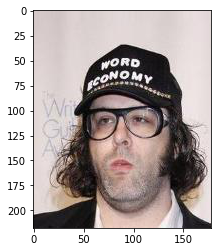

In [3]:
idx=0
plt.imshow(sample[idx])
print(labels[label_number])
print(target[idx])

# Define CNN's

In [4]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model=inception_v3(pretrained=False).to(device)

# Training Loop